In [1]:
import networkx as nx
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Undirected Graph

In [2]:
undirectedGraph = nx.Graph()

In [3]:
undirectedGraph.add_edges_from([
    ('A', 'B'), ('A', 'C'), 
    ('B', 'D'), ('B', 'E'), 
    ('C', 'F'), ('C', 'G')
])

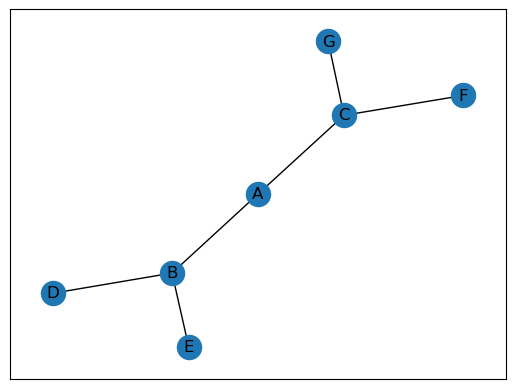

In [4]:
nx.draw_networkx(undirectedGraph, pos=nx.spring_layout(undirectedGraph, seed=0))

Directed Graph

In [5]:
directedGraph = nx.DiGraph()

In [6]:
directedGraph.add_edges_from([
    ('A', 'B'), ('A', 'C'), 
    ('B', 'D'), ('B', 'E'), 
    ('C', 'F'), ('C', 'G')
])

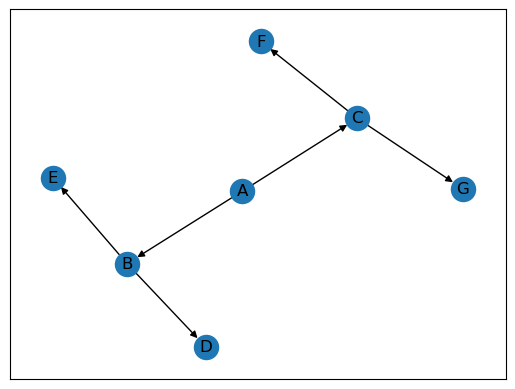

In [7]:
nx.draw_networkx(directedGraph, pos=nx.spring_layout(directedGraph, seed = 6))

Weighted Graph

In [8]:
weightedGraph = nx.Graph()

In [9]:
weightedGraph.add_edges_from([
    ('A', 'B', {"cost": 10}), 
    ('A', 'C', {"cost": 20}), 
    ('B', 'D', {"cost": 30}), 
    ('B', 'E', {"cost": 40}), 
    ('C', 'F', {"cost": 50}), 
    ('C', 'G', {"cost": 60}) 
])

In [10]:
labels = nx.get_edge_attributes(weightedGraph, "cost")

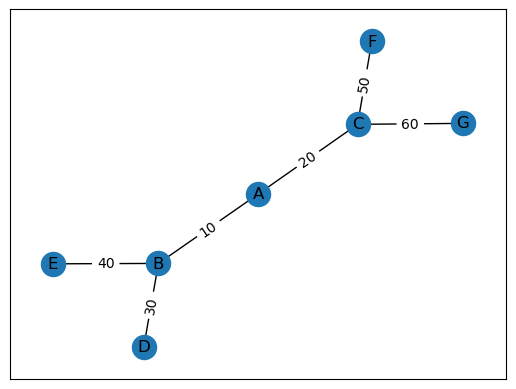

In [11]:
nx.draw_networkx(weightedGraph, pos=nx.spring_layout(weightedGraph, seed = 3))

nx.draw_networkx_edge_labels(weightedGraph, pos = nx.spring_layout(weightedGraph, seed = 3), edge_labels=labels)
plt.show()

Connected Graph

In [12]:
notConnected = nx.Graph()

In [13]:
notConnected.add_edges_from([(1, 2), (2, 3), (3, 1), (4, 5)])
print(f"Is graph connected? {nx.is_connected(notConnected)}")

Is graph connected? False


In [14]:
Connected = nx.Graph()

In [15]:
Connected.add_edges_from([(1, 2), (2, 3), (3, 1), (1, 4)])
print(f"Is graph connected? {nx.is_connected(Connected)}")

Is graph connected? True


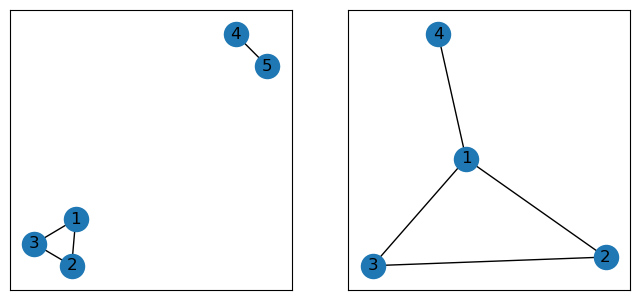

In [16]:
plt.figure(figsize=(8,8))
plt.subplot(221)

nx.draw_networkx(notConnected, pos=nx.spring_layout(notConnected, seed=0))

plt.subplot(222)
nx.draw_networkx(Connected, pos=nx.spring_layout(Connected, seed=0))

Minimum Cut Value

Applications in  network flow, optimizaiton, clustering, community detection.

In [82]:
# Create an undirected graph
G = nx.Graph()

In [83]:
# Add nodes
G.add_nodes_from([1, 2, 3, 4, 5])

In [84]:
# Add edges with weights (capacities)
G.add_edge(1, 2, capacity=10)
G.add_edge(1, 3, capacity=5)
G.add_edge(2, 3, capacity=15)
G.add_edge(2, 4, capacity=10)
G.add_edge(3, 4, capacity=10)
G.add_edge(4, 5, capacity=10)

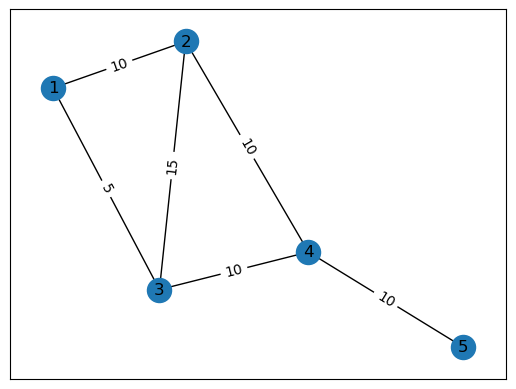

In [85]:
nx.draw_networkx(G, pos=nx.spring_layout(G, seed=1))

labels = nx.get_edge_attributes(G, "capacity")
nx.draw_networkx_edge_labels(G, pos = nx.spring_layout(G, seed=1), edge_labels=labels)
plt.show()

In [86]:
# Find the minimum cut using the Stoer-Wagner algorithm
cut_value, partition = nx.stoer_wagner(G)

print("Minimum Cut Value:", cut_value)
print("Partition (Node Group A):", partition)

Minimum Cut Value: 1
Partition (Node Group A): ([5], [1, 2, 3, 4])


In [97]:
# Find the minimum cut
cut_value, partition = nx.minimum_cut(G, 1, 5)

print("Minimum Cut Value:", cut_value)
print("Partition:", partition)

Minimum Cut Value: 10
Partition: ({1, 2, 3, 4}, {5})


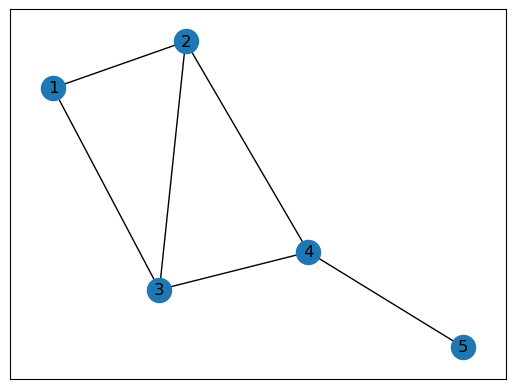

In [71]:
nx.draw_networkx(G, pos=nx.spring_layout(G, seed=1))
plt.show()

# Minimum Cut Values communication network

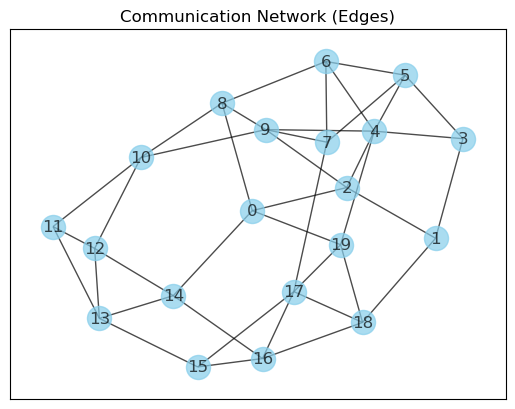

In [352]:
# 20 customers
customers = nx.connected_watts_strogatz_graph(20, 5, 0.1)

pos = nx.spring_layout(customers, seed=4)
nx.draw_networkx(customers, pos=pos, node_color='skyblue', alpha=0.7)
plt.title('Communication Network (Edges)')
plt.show()

In [353]:
# Perform community detection using minimum cut algorithm
cut_value, partition = nx.stoer_wagner(customers)

In [354]:
# Get the nodes in different partitions
group_A = partition[0]
group_B = partition[1]

print("Minimum Cut Value:", cut_value)
print("Partition (Node Group A):", group_A)
print("Partition (Node Group B):", group_B)

Minimum Cut Value: 3
Partition (Node Group A): [11]
Partition (Node Group B): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19]


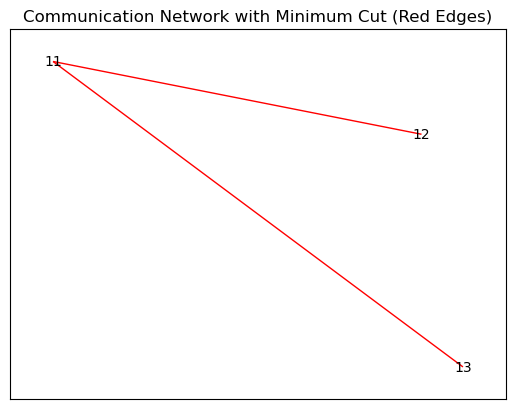

In [355]:
# Highlight edges forming the minimum cut
cut_edges = [(u, v) for u, v in customers.edges() if u in group_A and v in group_B]
nx.draw_networkx_edges(customers, pos, edgelist=cut_edges, edge_color='red')

# Draw labels
nx.draw_networkx_labels(customers, pos, font_size=10, font_family='sans-serif')

plt.title('Communication Network with Minimum Cut (Red Edges)')
plt.show()

Degree

In [360]:
Directed = nx.DiGraph()

In [361]:
Directed.add_edges_from(
    [
        ('A', 'B'), 
        ('A', 'C'), 
        ('B', 'D'), 
        ('B', 'E'), 
        ('C', 'F'), 
        ('C', 'G')
    ])

In [365]:
print(f"deg(A) = {Directed.in_degree['A']}")
print(f"deg(A) = {Directed.out_degree['A']}")

deg(A) = 0
deg(A) = 2


In [378]:
print("Node Degree (Total Relationships)\n", dict(Directed.degree()))

print("Node Indegree (Incoming Relationships)\n", dict(Directed.in_degree()))

print("Node Outdegree (Outgoing Relationships)\n", dict(Directed.out_degree()))

Node Degree (Total Relationships)
 {'A': 2, 'B': 3, 'C': 3, 'D': 1, 'E': 1, 'F': 1, 'G': 1}
Node Indegree (Incoming Relationships)
 {'A': 0, 'B': 1, 'C': 1, 'D': 1, 'E': 1, 'F': 1, 'G': 1}
Node Outdegree (Outgoing Relationships)
 {'A': 2, 'B': 2, 'C': 2, 'D': 0, 'E': 0, 'F': 0, 'G': 0}


In [396]:
print(f"Degree centrality of B {nx.degree_centrality(Directed)['B']}")

Degree centrality of B 0.5


In [397]:
print(f"Closeness centrality of B {nx.closeness_centrality(Directed)['B']}")

Closeness centrality of B 0.16666666666666666


In [398]:
print(f"Betweenness centrality of B {nx.betweenness_centrality(Directed)['B']}")

Betweenness centrality of B 0.06666666666666667
